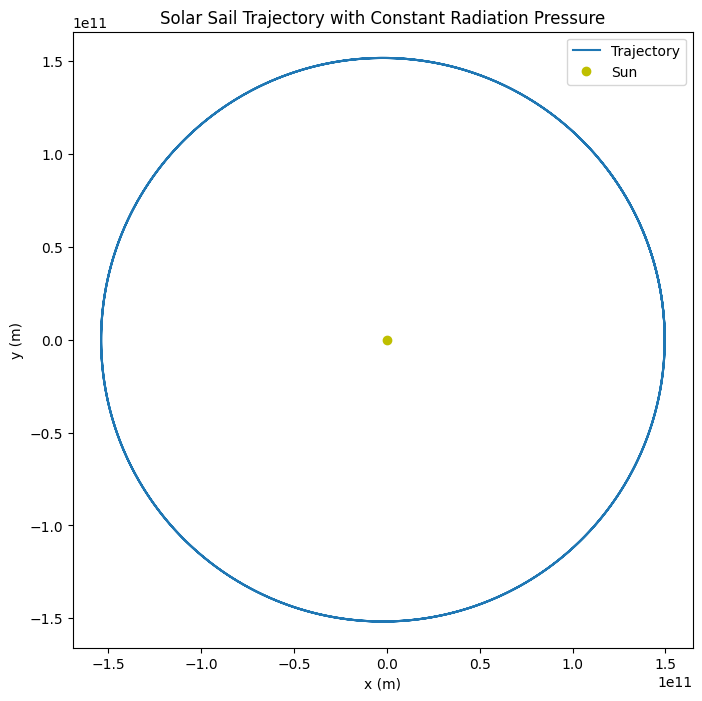

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants (example values)
G = 6.67430e-11      # gravitational constant, m^3 kg^-1 s^-2
M = 1.989e30         # mass of the sun, kg
m = 1000             # mass of the spacecraft, kg
P0 = 4.57e-6         # base radiation pressure, N/m^2 (example)
r0 = 1.496e11        # reference distance (1 AU), m

# Fluctuation parameters
epsilon = 0.2        # fluctuation amplitude
omega = 2 * np.pi / (365.25*24*3600)  # one cycle per year
phi = 0

# Simulation parameters
dt = 100             # time step in seconds
num_steps = 1000000

# Initial conditions: position (x, y) and velocity (vx, vy)
x = 1.496e11         # 1 AU along x
y = 0
vx = 0
vy = 30000           # approximate orbital speed in m/s

# Arrays to store the trajectory
xs, ys = [x], [y]

def radiation_pressure_force(x, y, t, theta, constant=True):
    r = np.sqrt(x**2 + y**2)
    if constant:
        pressure = P0
    else:
        # Non-linear, fluctuating radiation pressure
        pressure = P0 * (r0 / r)**2 * (1 + epsilon * np.sin(omega * t + phi)) * np.cos(theta)
    # Assume force acts radially outward (modify if using different orientation)
    fx = pressure * (x / r)
    fy = pressure * (y / r)
    return fx, fy

# Euler integration loop
for step in range(num_steps):
    t = step * dt
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_grav = -G * M * x / r**3
    ay_grav = -G * M * y / r**3

    # Choose model: set constant=False for fluctuating model
    fx_rad, fy_rad = radiation_pressure_force(x, y, t, theta=0, constant=False)
    ax_rad = fx_rad / m
    ay_rad = fy_rad / m

    # Total acceleration
    ax = ax_grav + ax_rad
    ay = ay_grav + ay_rad

    # Euler integration updates
    vx += ax * dt
    vy += ay * dt
    x += vx * dt
    y += vy * dt

    xs.append(x)
    ys.append(y)

# Visualization: plot the trajectory
plt.figure(figsize=(8, 8))
plt.plot(xs, ys, label='Trajectory')
plt.plot(0, 0, 'yo', label='Sun')  # Sun at the origin
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Solar Sail Trajectory with Constant Radiation Pressure')
plt.legend()
plt.axis('equal')
plt.show()

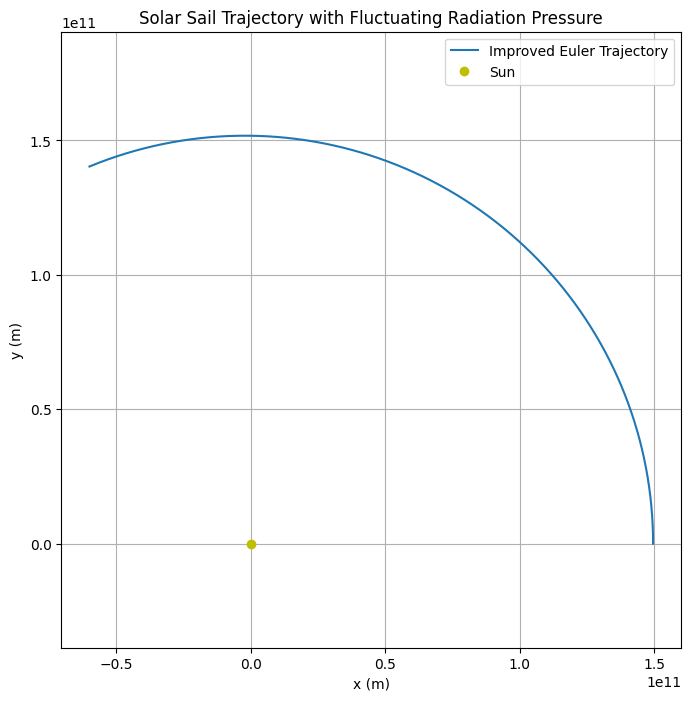

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11       # Gravitational constant (m^3/kg/s^2)
M = 1.989e30          # Mass of the Sun (kg)
m = 1000              # Spacecraft mass (kg)
P0 = 4.57e-6          # Base radiation pressure at 1 AU (N/m^2)
r0 = 1.496e11         # Reference distance (1 AU) in meters
A = 100              # Sail area in m^2
c = 3e8               # Speed of light (m/s)
K = P0 * A / (m * c)

# Fluctuation parameters
epsilon = 0.2
omega = 2 * np.pi / (365.25 * 24 * 3600)  # 1-year period
phi = 0

# Simulation parameters
dt = 100             # Time step (s)
num_steps = 100000

# Initial conditions
x, y = 1.496e11, 0
vx, vy = 0, 30000

# Logging arrays
xs, ys = [x], [y]

def compute_accelerations(x, y, t, theta=0, constant=False):
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_grav = -G * M * x / r**3
    ay_grav = -G * M * y / r**3
    
    if constant:
        pressure = P0
    else:
        pressure = P0 * (r0 / r)**2 * (1 + epsilon * np.sin(omega * t + phi)) * np.cos(theta)**2

    fx_rad = pressure * A * (x / r)
    fy_rad = pressure * A * (y / r)
    
    ax_rad = fx_rad / m
    ay_rad = fy_rad / m

    return ax_grav + ax_rad, ay_grav + ay_rad

# Integration using RK$ Method
for step in range(num_steps):
    t = step * dt

    # Step 1: Compute acceleration at current state
    ax1, ay1 = compute_accelerations(x, y, t)

    # Predictor step
    vx_temp = vx + ax1 * dt
    vy_temp = vy + ay1 * dt
    x_temp = x + vx * dt
    y_temp = y + vy * dt

    # Step 2: Compute acceleration at predicted state
    ax2, ay2 = compute_accelerations(x_temp, y_temp, t + dt)

    # Corrector step
    vx += 0.5 * (ax1 + ax2) * dt
    vy += 0.5 * (ay1 + ay2) * dt
    x += 0.5 * (vx + vx_temp) * dt
    y += 0.5 * (vy + vy_temp) * dt

    xs.append(x)
    ys.append(y)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(xs, ys, label='Improved Euler Trajectory')
plt.plot(0, 0, 'yo', label='Sun')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Solar Sail Trajectory with Fluctuating Radiation Pressure')
plt.axis('equal')
plt.legend()
plt.grid(True)
plt.show()


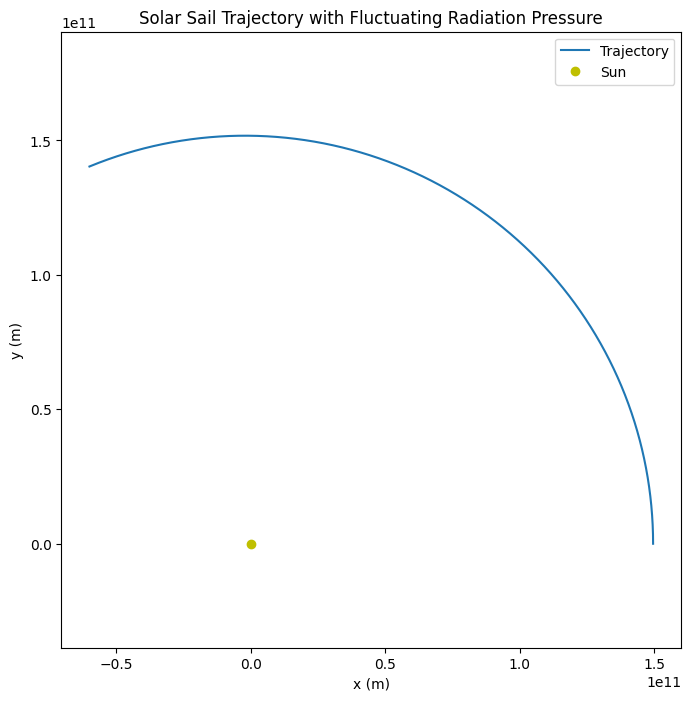

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11       # Gravitational constant (m^3/kg/s^2)
M = 1.989e30          # Mass of the Sun (kg)
m = 1000              # Spacecraft mass (kg)
P0 = 4.57e-6          # Base radiation pressure at 1 AU (N/m^2)
r0 = 1.496e11         # Reference distance (1 AU) in meters
A = 100               # Sail area in m^2
c = 3e8               # Speed of light (m/s)
K = P0 * A / (m * c)

# Fluctuation parameters
epsilon = 0.2
omega = 2 * np.pi / (365.25 * 24 * 3600)  # 1-year period
phi = 0

# Simulation parameters
dt = 100             # Time step (s)
num_steps = 100000

# Initial conditions
x, y = 1.496e11, 0
vx, vy = 0, 30000

# Logging arrays
xs, ys = [x], [y]

def compute_accelerations(x, y, t, theta=0, constant=False):
    r = np.sqrt(x**2 + y**2)
    
    # Gravitational acceleration
    ax_grav = -G * M * x / r**3
    ay_grav = -G * M * y / r**3
    
    if constant:
        pressure = P0
    else:
        pressure = P0 * (r0 / r)**2 * (1 + epsilon * np.sin(omega * t + phi)) * np.cos(theta)**2

    fx_rad = pressure * A * (x / r)
    fy_rad = pressure * A * (y / r)
    
    ax_rad = fx_rad / m
    ay_rad = fy_rad / m

    return ax_grav + ax_rad, ay_grav + ay_rad

# Integration using RK4 Method
for step in range(num_steps):
    t = step * dt

    # Step 1: Compute acceleration at the current state
    ax1, ay1 = compute_accelerations(x, y, t)

    # Step 2: Compute acceleration at the predicted state (using the initial velocities and accelerations)
    vx_temp = vx + 0.5 * ax1 * dt
    vy_temp = vy + 0.5 * ay1 * dt
    x_temp = x + 0.5 * vx * dt
    y_temp = y + 0.5 * vy * dt
    ax2, ay2 = compute_accelerations(x_temp, y_temp, t + 0.5 * dt)

    # Step 3: Compute acceleration at the predicted state with updated velocities
    vx_temp = vx + 0.5 * ax2 * dt
    vy_temp = vy + 0.5 * ay2 * dt
    x_temp = x + 0.5 * vx_temp * dt
    y_temp = y + 0.5 * vy_temp * dt
    ax3, ay3 = compute_accelerations(x_temp, y_temp, t + 0.5 * dt)

    # Step 4: Compute acceleration at the predicted state with full step
    vx_temp = vx + ax3 * dt
    vy_temp = vy + ay3 * dt
    x_temp = x + vx_temp * dt
    y_temp = y + vy_temp * dt
    ax4, ay4 = compute_accelerations(x_temp, y_temp, t + dt)

    # Step 5: Combine all accelerations using the RK4 formula
    vx += (ax1 + 2*ax2 + 2*ax3 + ax4) * dt / 6
    vy += (ay1 + 2*ay2 + 2*ay3 + ay4) * dt / 6
    x += (vx + 2*vx_temp + 2*vx_temp + vx_temp) * dt / 6
    y += (vy + 2*vy_temp + 2*vy_temp + vy_temp) * dt / 6

    xs.append(x)
    ys.append(y)

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(xs, ys, label='Trajectory')
plt.plot(0, 0, 'yo', label='Sun')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Solar Sail Trajectory with Fluctuating Radiation Pressure')
plt.axis('equal')
plt.legend()
# plt.grid(True)
plt.show()


In [7]:
from pysr import PySRRegressor

X = np.array([xs, ys]).T
y = np.gradient(xs)  # Or whatever target dynamic

model = PySRRegressor(
    niterations=100,
    binary_operators=["+", "*", "-", "/"],
    unary_operators=["sin", "cos", "exp", "log"],
)

model.fit(X, y)
print(model)

[juliapkg] Found dependencies: /home/couchbucks/Documents/saketh/solar_sails/env/lib/python3.12/site-packages/pysr/juliapkg.json
[juliapkg] Found dependencies: /home/couchbucks/Documents/saketh/solar_sails/env/lib/python3.12/site-packages/juliacall/juliapkg.json
[juliapkg] Found dependencies: /home/couchbucks/Documents/saketh/solar_sails/env/lib/python3.12/site-packages/juliapkg/juliapkg.json
[juliapkg] Locating Julia =1.10.0, ^1.10.3
[juliapkg] Querying Julia versions from https://julialang-s3.julialang.org/bin/versions.json
[juliapkg] WARNING: About to install Julia 1.11.4 to /home/couchbucks/Documents/saketh/solar_sails/env/julia_env/pyjuliapkg/install.
[juliapkg]   If you use juliapkg in more than one environment, you are likely to
[juliapkg]   have Julia installed in multiple locations. It is recommended to
[juliapkg]   install JuliaUp (https://github.com/JuliaLang/juliaup) or Julia
[juliapkg]   (https://julialang.org/downloads) yourself.
[juliapkg] Downloading Julia from https://

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed Adapt ──────────────────── v4.3.0
   Installed ADTypes ────────────────── v1.14.0
   Installed DynamicDiff ────────────── v0.2.1
   Installed Setfield ───────────────── v1.1.2
   Installed JSON3 ──────────────────── v1.14.2
   Installed DynamicExpressions ─────── v1.10.0
   Installed PythonCall ─────────────── v0.9.24
   Installed Optim ──────────────────── v1.12.0
   Installed NaNMath ────────────────── v1.1.3
   Installed Requires ───────────────── v1.3.1
   Installed NLSolversBase ──────────── v7.9.1
   Installed EnumX ──────────────────── v1.0.5
   Installed DataStructures ─────────── v0.18.22
   Installed ForwardDiff ────────────── v1.0.1
   Installed DifferentiationInterface ─ v0.6.51
   Installed DynamicQuantities ──────── v1.8.0
   Installed DocStringExtensions ────── v0.9.4
   Installed SymbolicRegression ─────── v1.9.2
   Installed pixi_jll ───────────────── v0.41.3+0
   

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


/home/couchbucks/Documents/saketh/solar_sails/env/lib/python3.12/site-packages/pysr/sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
/home/couchbucks/Documents/saketh/solar_sails/env/lib/python3.12/site-packages/pysr/sr.py:2241: UserWarning: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (https://ai.damtp.cam.ac.uk/pysr/options/#batching). You should also reconsider if you need that many datapoints. Unless you have a large amount of noise (in which case you should smooth your dataset first), generally < 10,000 datapoints is enough to find a functional form with symbolic regression. More datapoints will lower the search speed.
  warnings.warn(
Compiling Julia backend...
[ Info: Note: you are running with more than 10,000 datapoints. You should consider turning on batching (`options.batching`), and also if you need that many datapoints. Unless you have a large am


Expressions evaluated per second: 0.000e+00
Progress: 0 / 31000 total iterations (0.000%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 1.800e+01
Progress: 1 / 31000 total iterations (0.003%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.168e+11  1.594e+01  y = -2.0962e+06
───────────────────────────